READ INPUT FILES...     -> READ MESH DATA FILES...Done!
     -> READ FIX DATA FILE...Done!
     -> READ EQUILI DATA FILE...Done!
Done!
PREPARE OUTPUT DIRECTORY...Done!
INITIALIZATION...
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE PLASMA BOUNDARY INTERFACE...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_FEMCutFEM/TESTs/../src/Element.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([xi,eta]).reshape((1,2))


Done!
     -> IDENTIFY GHOST FACES...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Done!
     -> COMPUTE INITIAL GUESS...
         -> INITIALISE PSI ARRAYS...Done!
         -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!
         -> COMPUTE INITIAL VACUUM VESSEL BOUNDARY VALUES PSI_B...Total plasma current computed =  -3019204103.952813
Total plasma current normalization factor =  0.004968196744420706
Normalised total plasma current =  -15000000.0
Done!
         -> ASSIGN INITIAL BOUNDARY VALUES...Done!
     Done!
Done!


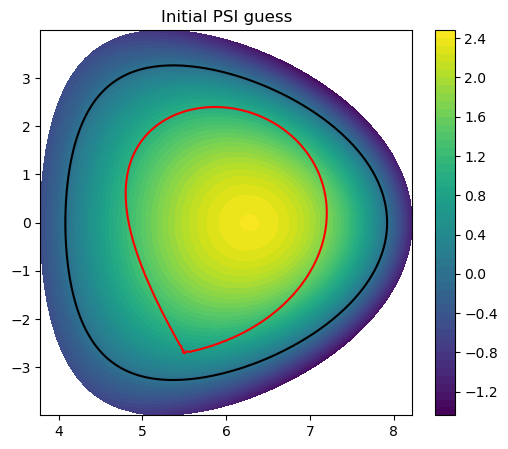

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1


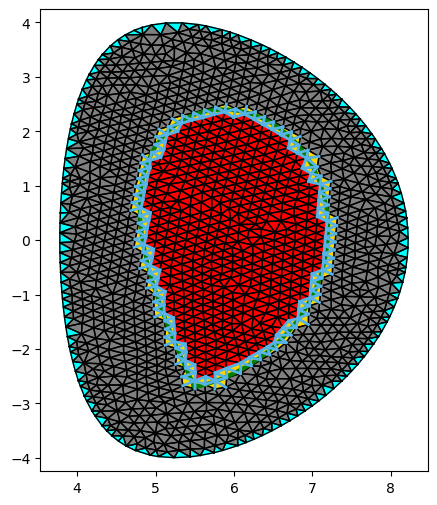

     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.07389622 0.13716183]  (ELEMENT  1914 ) WITH VALUE PSI_0 =  [1401.32447091]
SADDLE POINT AT  [ 4.72367221 -3.55472838]  (ELEMENT  322 ) WITH VALUE PSI_X =  [-88.47732516]


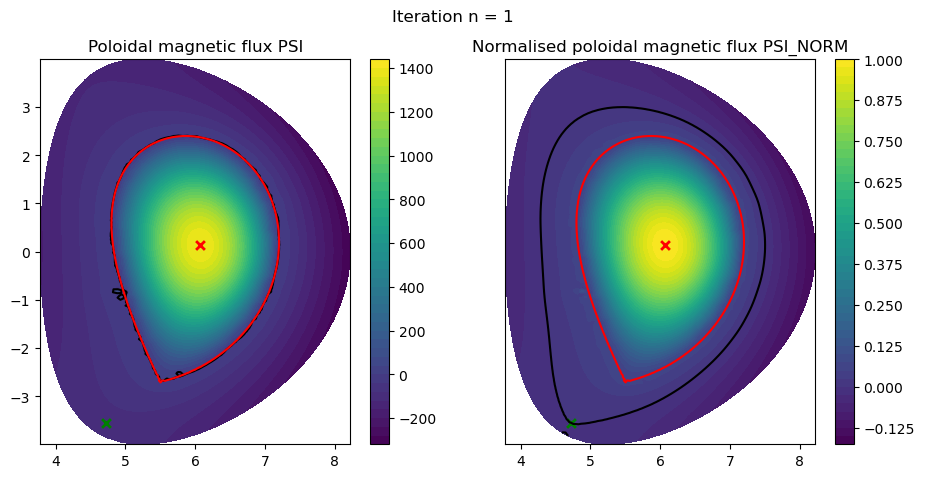

Internal iteration =  1 , PSI_NORM residu =  2.9450647387519115
 


/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_FEMCutFEM/TESTs/../src/Element.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([xi,eta]).reshape((1,2))


OUTER ITERATION = 1 , INNER ITERATION = 2


In [ ]:
import sys
sys.path.append('../')

from src.GradShafranovFEMCutFEM import *

### SELECT MESH FOLDER...
###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TS-FEMCUTFEM-TRI03-COARSE'
#MESH = 'TS-FEMCUTFEM-TRI03-MEDIUM'
#MESH = 'TS-FEMCUTFEM-TRI03-FINE'

###### QUADRATIC TRIANGULAR ELEMENT MESH
#MESH = 'TS-FEMCUTFEM-TRI06-COARSE'
#MESH = 'TS-FEMCUTFEM-TRI06-MEDIUM'
#MESH = 'TS-FEMCUTFEM-TRI06-FINE'

###### LINEAR TRIANGULAR ELEMENT ENLARGED MESH
#MESH = 'TS-FEMCUTFEM-TRI03-MEDIUM-ENLARGED'
#MESH = 'TS-FEMCUTFEM-TRI03-INTERMEDIATE-ENLARGED'
#MESH = 'TS-FEMCUTFEM-TRI03-FINE-ENLARGED'

###### QUADRATIC TRIANGULAR ELEMENT ENLARGED MESH
#MESH = 'TS-FEMCUTFEM-TRI06-MEDIUM-ENLARGED'
MESH = 'TS-FEMCUTFEM-TRI06-INTERMEDIATE-ENLARGED'
#MESH = 'TS-FEMCUTFEM-TRI06-FINE-ENLARGED'


### SELECT SOLUTION CASE FILE:
CASE = 'TS-FREE-PROFILES-2'

##############################################################

## CREATE GRAD-SHAFRANOV PROBLEM 
Problem = GradShafranovFEMCutFEM(MESH,CASE)
## DECLARE SWITCHS:
##### GHOST PENALTY STABILISATION
Problem.GhostPenalty = True
##### OUTPUT PLOTS IN RUNTIME
Problem.plotElemsClassi_output = True         # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Problem.plotPSI_output = True                 # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Problem.PARAMS_output = False                  # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Problem.PSI_output = False                     # OUTPUT SWITCH FOR PSI FIELD VALUES OBTAINED BY SOLVING THE CutFEM SYSTEM
Problem.PSIcrit_output = False                 # OUTPUT SWITCH FOR CRITICAL PSI VALUES
Problem.PSI_NORM_output = False                # OUTPUT SWITCH FOR THE PSI_NORM FIELD VALUES (AFTER NORMALISATION OF PSI FIELD)
Problem.PSI_B_output = False                   # OUTPUT SWITCH FOR PSI_B BOUNDARY VALUES
Problem.RESIDU_output = False                  # OUTPUT SWITCH FOR RESIDU FOR EACH ITERATION
Problem.ElementsClassi_output = False          # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Problem.PlasmaLevSetVals_output = False        # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Problem.VacVessLevSetVals_output = False       # OUTPUT SWITCH FOR VACUUM VESSEL BOUNDARY LEVEL-SET FIELD VALUES
Problem.L2error_output = False                 # OUTPUT SWITCH FOR ERROR FIELD AND THE L2 ERROR NORM FOR THE CONVERGED SOLUTION 
Problem.ELMAT_output = False                  # OUTPUT SWITCH FOR ELEMENTAL MATRICES

## COMPUTE PLASMA EQUILIBRIUM
Problem.EQUILI()